**Iris_Example**


In [23]:
%pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [25]:
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [26]:
print(iris_dataset['DESCR'][:193]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [27]:
print("Target names:{}".format(iris_dataset['target_names']))

Target names:['setosa' 'versicolor' 'virginica']


In [28]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [29]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [30]:
print("First five columns of dataset{}".format(iris_dataset['data'][:5]))

First five columns of dataset[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [31]:
print("Target species: {}".format(iris_dataset['target']))
print("\n\n Type of target species: {}".format(type(iris_dataset['target'])))
print("\n\n Shape of the target species array: {}".format(iris_dataset['target'].shape))

Target species: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


 Type of target species: <class 'numpy.ndarray'>


 Shape of the target species array: (150,)


In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=20)
# here 'X'denotes the data and 'y' denotes the label thinking of a f(x)=y


In [33]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [34]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


**Inspecting the data set by visulaizing it using scatter plot but scatter plot is not that efficient to relate since we have only 2d plotting to capture few features at once.
so we would be doing pairplot for plotting features upto 4. since pairplot does not show the interaction of all features at once**

**To create a pairplot we need to convert the numpyarrays to the pandas dataframe.And pandas have this function to create pair plots called scatter_matrix .Each species have its colour on the plot**

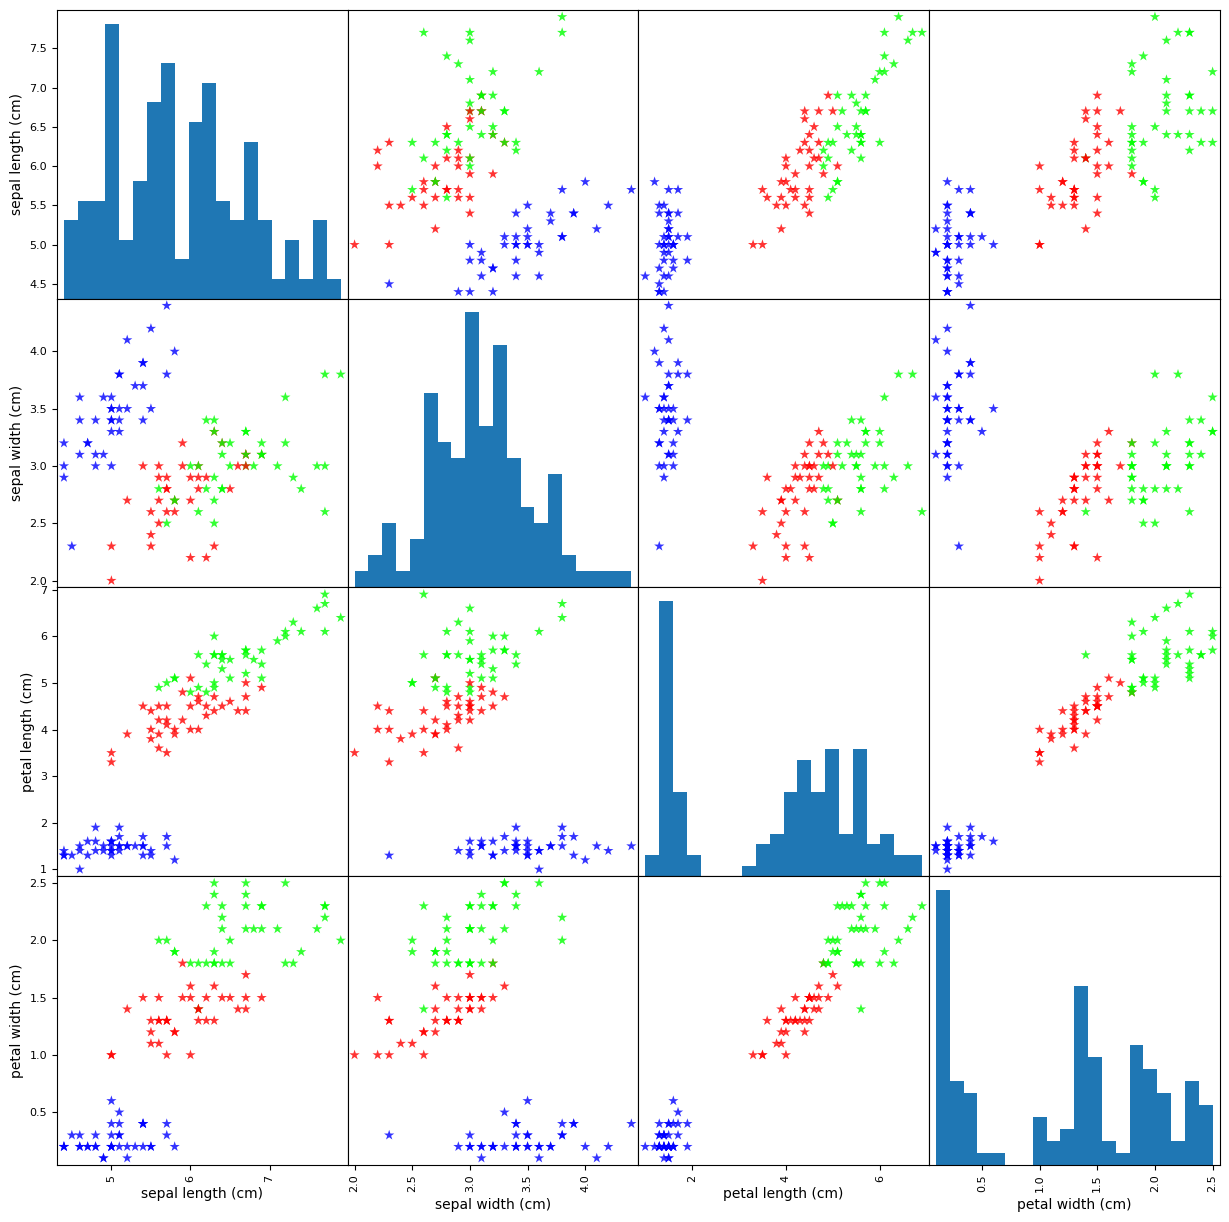

In [35]:
import pandas as pd
from matplotlib.colors import ListedColormap
iris_dataframe = pd.DataFrame(X_train,columns=iris_dataset.feature_names)
# creating the scatter matrix
grr = pd.plotting.scatter_matrix(iris_dataframe,c=y_train,figsize=(15,15),marker='*',hist_kwds={'bins':20},s=60,alpha=.8,cmap = ListedColormap(['#0000FF', '#FF0000', '#00FF00'])
)

**so far we have determined the relation here using positive ,negative and no co-relation . The histogram shows the exact relation and cluster shows the varaiations . x axis contain one feature and y axis contain another feature** 

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

In [37]:
knn.fit(X_train,y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


postal housing data


week1: software installation steps and demonstration week2 - package demonstrations -numpy,pandas,matplotlib,sklearn week3- preprocessing techniques , week4 - implementations of simple linear regression 


In [38]:
%pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [39]:
import numpy as np
X_new = np.array([[5,0.7,4,0]])
print("Shape of X_new: {}".format(X_new.shape))


Shape of X_new: (1, 4)


In [40]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name:{}".format(iris_dataset['target_names'][prediction]))

Prediction: [1]
Predicted target name:['versicolor']


In [41]:
y_pred = knn.predict(X_test)
print("\n\nTest set predictions:\n{}".format(y_pred))
print("\n\nTest set score :{:.2f}".format(np.mean(y_pred==y_test)))
print("\n\n Test set score:{:.2f}".format(knn.score(X_test,y_test)))




Test set predictions:
[0 1 1 2 1 1 2 0 2 0 2 1 2 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 2 1 1 0 0 0 1 1
 0]


Test set score :0.97


 Test set score:0.97


**preprocessing the data:**

**preparing data as requirement using scikit-learn**
**there are three types of problems: handling missing value(" ",NaN)->handling missing value by imputation or average** 
**2.Encoding categorical form: example of species in the above with numbers.Two tyoe of one-hot encoding(feature),label encoding(target)**
**3.Feature scaling -> bringing the values on same scale and eliminate the outlier**

**observation and record -> preprocessing techniques one programm of each and iris example**


In [42]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

# --- 1. Sample Data (Conceptual) ---
data = {'Age': [25, 30, np.nan, 40, 35],
        'Salary': [50000, np.nan, 60000, 75000, 65000]}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# --- 2. Initialize and Apply Imputer ---
# Strategy: Replace NaN with the mean of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the 'Age' column and transform it
# Note: We reshape to (n_samples, 1) because imputer expects 2D array
# df['Age_Imputed'] = imputer.fit_transform(df[['Age']])

# --- 3. Result ---
# To impute all numerical columns:
df[['Age', 'Salary']] = imputer.fit_transform(df[['Age', 'Salary']])

print("\nDataFrame after Imputing 'Age' with the Mean:\n", df)



Original DataFrame:
     Age   Salary
0  25.0  50000.0
1  30.0      NaN
2   NaN  60000.0
3  40.0  75000.0
4  35.0  65000.0

DataFrame after Imputing 'Age' with the Mean:
     Age   Salary
0  25.0  50000.0
1  30.0  62500.0
2  32.5  60000.0
3  40.0  75000.0
4  35.0  65000.0


In [43]:
import pandas as pd

# --- 1. Sample Data (Conceptual) ---
data = {'ID': [1, 2, 3, 4],
        'City': ['New York', 'Paris', 'New York', 'London']}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# --- 2. Apply One-Hot Encoding ---
# The 'City' column is converted into three new columns:
# City_London, City_New York, City_Paris
df_encoded = pd.get_dummies(df, columns=['City'], prefix='City')

# --- 3. Result ---
print("\nDataFrame after One-Hot Encoding:\n", df_encoded)

Original DataFrame:
    ID      City
0   1  New York
1   2     Paris
2   3  New York
3   4    London

DataFrame after One-Hot Encoding:
    ID  City_London  City_New York  City_Paris
0   1        False           True       False
1   2        False          False        True
2   3        False           True       False
3   4         True          False       False


In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- 1. Sample Data (Conceptual) ---
# Note the wide range of 'Height' values
data = {'Height': [160, 185, 172, 190, 165]}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# --- 2. Initialize and Apply Scaler ---
# Note: We reshape to (n_samples, 1) because scaler expects 2D array
scaler = StandardScaler()

df['Height_Scaled'] = scaler.fit_transform(df[['Height']])

# --- 3. Result ---
print("\nDataFrame after Standardization (Z-score):\n", df)

# You can check the mean and std dev of the scaled column:
print("\nScaled Mean:", df['Height_Scaled'].mean())
print("Scaled Std Dev:", df['Height_Scaled'].std())

Original DataFrame:
    Height
0     160
1     185
2     172
3     190
4     165

DataFrame after Standardization (Z-score):
    Height  Height_Scaled
0     160      -1.256026
1     185       0.924575
2     172      -0.209338
3     190       1.360695
4     165      -0.819906

Scaled Mean: -5.10702591327572e-16
Scaled Std Dev: 1.118033988749895


In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- 1. Sample Data (Conceptual) ---
data = {'Customer_ID': [101, 102, 103, 104, 105],
        'Tshirt_Size': ['Large', 'Medium', 'Small', 'Large', 'Medium']}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# --- 2. Initialize and Apply LabelEncoder ---
# Note: LabelEncoder works directly on a 1D array (a single column/Series).
le = LabelEncoder()

# Fit the encoder to the 'Tshirt_Size' column and transform it
df['Size_Encoded'] = le.fit_transform(df['Tshirt_Size'])

# --- 3. Result ---
print("\nDataFrame after Label Encoding:\n", df)
print("\nMapping of Labels to Integers:")

# Display the mapping for clarity (optional step)
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

Original DataFrame:
    Customer_ID Tshirt_Size
0          101       Large
1          102      Medium
2          103       Small
3          104       Large
4          105      Medium

DataFrame after Label Encoding:
    Customer_ID Tshirt_Size  Size_Encoded
0          101       Large             0
1          102      Medium             1
2          103       Small             2
3          104       Large             0
4          105      Medium             1

Mapping of Labels to Integers:
{'Large': np.int64(0), 'Medium': np.int64(1), 'Small': np.int64(2)}
